
# DA5401 Assignment #2 —  Dimensionality Reduction, Visualization, and Classification Performance

**Author:** Abesech Inbasekar  
**Course:** DA5401  
**Dataset:** Mushroom Dataset (Kaggle)  


## Part A — Exploratory Data Analysis (EDA) & Preprocessing

In [35]:
#Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the dataset

df = pd.read_csv('/content/drive/MyDrive/DA5401/mushrooms.csv')
print(df.head())

#Target Separation

y = df['class']
x = df.drop('class',axis=1)

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

###Why we start with target separation?

The Mushroom dataset is entirely categorical — every feature, from cap-shape to odor, is stored as a symbolic label rather than a number.
Since our eventual goal is to apply **Principal Component Analysis (PCA)** and **Logistic Regression**, both of which require numerical inputs,
we need to first think carefully about how to represent these categories in a vector space.

The first crucial step is to **separate the target variable** (`class`) from the rest of the features.
This makes the problem setting explicit: our features (X) will describe the mushroom’s characteristics, while the target (y)
encodes the label we want to predict — whether the mushroom is edible (`e`) or poisonous (`p`).

Framing the dataset this way highlights the **supervised learning setting**: we have feature vectors and corresponding labels.
It also sets the stage for dimensionality reduction: PCA will be applied only to the feature space, not to the target labels.
By keeping this distinction clear, we maintain the correct vector space structure that PCA can operate on.


In [4]:
#Visualising structure of Features Dataframe:

print(x.head())
print("\nNumber of colums before one hot encoding = ", x.shape[1])

#One-hot Encoding:

x_encoded = pd.get_dummies(x)
print('\n',x_encoded.head())
print("\nNumber of colums after one hot encoding = ", x_encoded.shape[1])

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                    

###Why one-hot encoding is necessary before PCA

Each feature in the Mushroom dataset is categorical — for example, the "cap-shape" attribute may take values such as `bell`, `flat`, or `knobbed`.
If we simply assign numbers to these categories (e.g., `bell = 1`, `flat = 2`, `knobbed = 3`), the model would incorrectly assume that there is a
numerical ordering or distance among them. In reality, these categories are distinct and have no inherent ranking.

To resolve this, we apply **one-hot encoding**, which creates a separate binary column for each possible category.
For "cap-shape," instead of a single column with labels, we now have multiple columns such as `cap-shape_bell`, `cap-shape_flat`, and `cap-shape_knobbed`.
A mushroom with a flat cap would be represented as `(0,1,0)`, while one with a bell-shaped cap would be `(1,0,0)`.

This transformation has two important consequences:

1. **Mathematical compatibility**: PCA operates in a vector space where axes represent numeric features.
   By converting categories into independent binary axes, we make the dataset suitable for linear algebra operations such as covariance and eigen decomposition.  

2. **Geometric interpretation**: Each category is placed along its own orthogonal axis.
   This removes any false sense of ordering among categories and ensures that the geometry of the feature space reflects independence between different attribute values.

###Observing dimensional explosion after one-hot encoding

Before encoding, the Mushroom dataset has only a modest number of attributes — around twenty features, each described as a categorical variable. However, once we apply one-hot encoding, each category value expands into its own binary column.

For example, a single attribute like `cap-color` may branch into more than ten separate binary columns, one for each possible color. Repeating this across all attributes causes the dataset’s dimensionality to grow dramatically: what began as roughly twenty columns quickly balloons into over a hundred.

This **dimensional explosion** is an important moment in the workflow. On the one hand, it gives us a mathematically valid way to represent categories in vector space. On the other hand, it highlights the challenge of working in high-dimensional spaces, where redundancy and correlation between features become unavoidable.

This observation sets the stage for dimensionality reduction. By acknowledging the sharp increase in feature count, we create a natural motivation for applying PCA: to compress the feature space while still preserving the essential variance in the data.


In [7]:
#Standardization:

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_encoded) #Returns a numpy array

x_scaled = pd.DataFrame(x_scaled,columns = x_encoded.columns) #Convert numpy array to DataFrame
print(x_scaled)




      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0       -0.242725    -0.022195     -0.79621    -0.336878    -0.062885   
1       -0.242725    -0.022195     -0.79621    -0.336878    -0.062885   
2        4.119885    -0.022195     -0.79621    -0.336878    -0.062885   
3       -0.242725    -0.022195     -0.79621    -0.336878    -0.062885   
4       -0.242725    -0.022195     -0.79621    -0.336878    -0.062885   
...           ...          ...          ...          ...          ...   
8119    -0.242725    -0.022195     -0.79621     2.968433    -0.062885   
8120    -0.242725    -0.022195     -0.79621    -0.336878    -0.062885   
8121    -0.242725    -0.022195      1.25595    -0.336878    -0.062885   
8122    -0.242725    -0.022195     -0.79621     2.968433    -0.062885   
8123    -0.242725    -0.022195     -0.79621    -0.336878    -0.062885   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0        1.105487      -0.632238      -0.0

###Why standardization is needed even after one-hot encoding

At first glance, one might assume that standardization is unnecessary because the
one-hot encoded features are binary (0 or 1). However, the **frequency of categories**
in the dataset is highly uneven. For example, `odor=none` appears very frequently,
whereas rare odors like `creosote` occur in only a handful of samples. This means
the variances of the binary columns differ significantly: common categories have
higher variance, while rare categories have very low variance.  

Since PCA is a variance-maximizing technique, it would disproportionately align
its first principal components with the most common categories if the data were left
unscaled. In other words, PCA would mistake frequency for importance.  

By applying standardization (zero mean, unit variance), we place all features on an
equal footing before PCA. This ensures that the rotation into principal components
captures genuine structure in the dataset, rather than artifacts of scale. In vector
space terms, standardization prevents certain axes from dominating the geometry
simply because of their frequency.




## Part B: Principal Component Analysis (PCA)

In [28]:
#Applying PCA to standardised one-hot encoded features dataset

pca = PCA()

x_pca = pca.fit(x_scaled)

###Performing PCA without restricting dimensionality

To begin dimensionality reduction, we apply PCA to the standardized feature space. At this stage, we do not restrict the number of components, because our goal is to first understand how variance is distributed across all possible directions in the feature space. This full decomposition allows us to later choose an optimal number of components based on how much of the total variance each captures.

By capturing the principal directions of variance in the dataset, PCA rotates the original feature space into a new set of orthogonal axes. These axes are ordered by how much variation they explain — the first principal component (PC1) captures the most, the second (PC2) the next most, and so on. This sets the stage for deciding how many components to retain while ensuring minimal information loss.


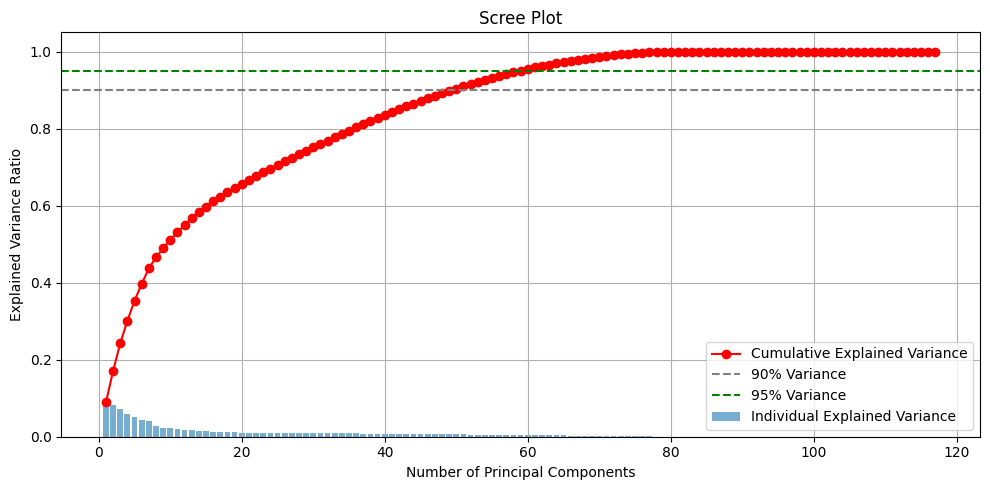

In [29]:
#Scree plot

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))

# Individual explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual Explained Variance')

# Cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Cumulative Explained Variance')

# Reference lines (optional)
plt.axhline(y=0.90, color='gray', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Variance')

# Labels and legend
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


### Identifying the optimal number of principal components

The scree plot provides a visual summary of how variance is distributed across the principal components. The blue bars represent the individual explained variance for each component, while the red curve shows the cumulative variance accumulated as more components are added.

From the plot, we observe a sharp drop in variance after the first few components, followed by a long tail of components contributing only marginally. This is characteristic of datasets with **high feature redundancy** — a perfect setting for PCA.

To balance dimensionality reduction with information retention, we aim to preserve at least **95% of the total variance**. According to the cumulative curve, this threshold is reached at around **60 components**. Thus, we choose to retain the first **60 principal components** for downstream tasks.

This choice effectively reduces the feature space from over 117 dimensions down to 60, while still preserving most of the structure and variance in the dataset. It also minimizes the risk of overfitting, reduces computational cost, and ensures that later visualizations and models operate on a more compact yet expressive representation.


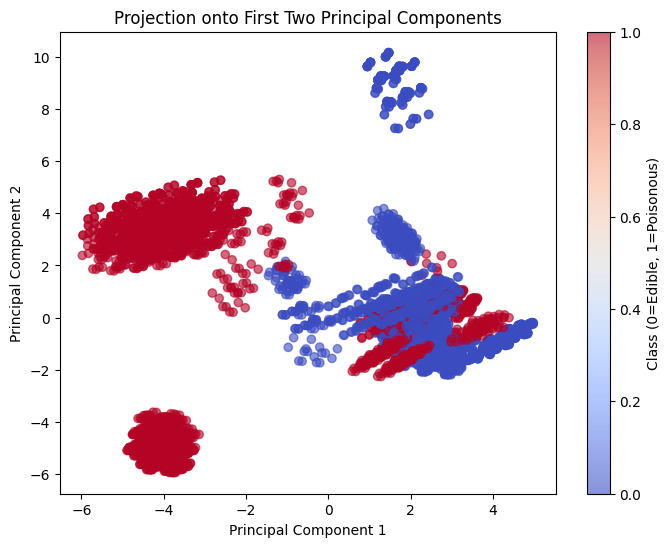

In [31]:
x_pca = pca.transform(x_scaled)

#Scatter plot with first two PC's

plt.figure(figsize=(8, 6))
plt.scatter(
    x_pca[:, 0], x_pca[:, 1],
    c=(y == 'p'),  # poisonous = 1, edible = 0
    cmap='coolwarm', alpha=0.6
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection onto First Two Principal Components')
plt.colorbar(label='Class (0=Edible, 1=Poisonous)')
plt.show()






###Visualizing the dataset in PCA-reduced space

After reducing the dataset with PCA, we project the data onto the first two principal components. The scatter plot shows edible and poisonous mushrooms colored separately. The plot reveals that the two classes are not randomly intermixed: several clusters form where one class dominates, and some regions of overlap remain. This suggests that PCA preserves meaningful structure related to edibility while compressing the high-dimensional feature space.

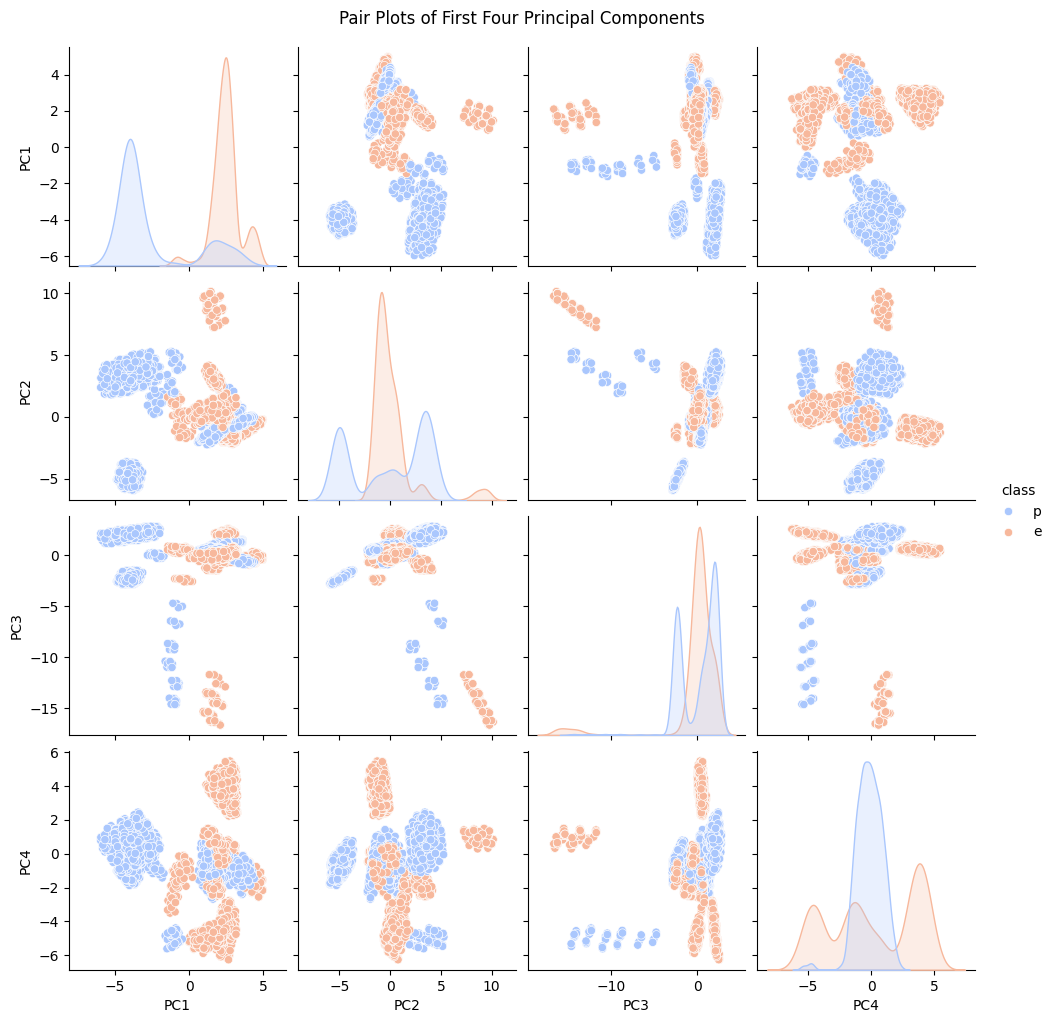

In [33]:
import seaborn as sns

# Build DataFrame with first few PCs + labels
pca_df = pd.DataFrame(x_pca[:, :4], columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['class'] = y

# Pair plot (scatter matrix)
sns.pairplot(pca_df, hue='class', vars=['PC1', 'PC2', 'PC3', 'PC4'], palette='coolwarm')
plt.suptitle('Pair Plots of First Four Principal Components', y=1.02)
plt.show()




To further explore the geometry, we generated pair plots of the first four principal components. These plots provide additional perspectives on class separability. While some principal component pairs show overlapping distributions between edible and poisonous mushrooms, others reveal distinct clusters, especially along PC1 and PC2. The density plots on the diagonal also highlight differences in how each class is distributed along individual components.

Overall, these visualizations indicate that PCA successfully captures variance patterns tied to the class labels. Although perfect separation is not achieved in two dimensions, the clusters suggest that the PCA-reduced space retains strong signals for classification. This confirms that dimensionality reduction has preserved essential discriminative information while simplifying the feature space.


##Part C: Performance Evaluation with Logistic Regression

In [36]:
#split the dataset:

x_train, x_test, y_train, y_test = train_test_split( x_encoded, y, test_size=0.2, stratify=y, random_state=42)

#Baseline model
baseline_pipe = Pipeline([
    ("scaler", StandardScaler()),  # ok for dense one-hot; if sparse, use with_mean=False
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear"))
])

baseline_pipe.fit(x_train, y_train)
y_pred_base = baseline_pipe.predict(x_test)

acc_base = accuracy_score(y_test, y_pred_base)
print("baseline accuracy:", acc_base)
print("baseline classification report:\n", classification_report(y_test, y_pred_base, digits=4))



baseline accuracy: 1.0
baseline classification report:
               precision    recall  f1-score   support

           e     1.0000    1.0000    1.0000       842
           p     1.0000    1.0000    1.0000       783

    accuracy                         1.0000      1625
   macro avg     1.0000    1.0000    1.0000      1625
weighted avg     1.0000    1.0000    1.0000      1625



###Baseline Logistic Regression Performance

As a baseline, we trained a Logistic Regression model on the standardized, one-hot encoded features without applying PCA. The model achieved **perfect accuracy (100%)** on the held-out test set, with precision, recall, and F1-scores of 1.0 for both edible and poisonous mushrooms.

This outcome suggests that the original feature representation is already highly separable for the Logistic Regression classifier. In fact, the one-hot encoded attributes capture strong discriminatory signals that allow the model to distinguish edible from poisonous mushrooms without error.

While such perfect performance might appear surprising, it is consistent with prior knowledge of the dataset: certain features (such as odor) are extremely predictive of the target class. This makes Logistic Regression on the full feature set a very strong baseline against which we can compare PCA-transformed models.


In [37]:
n_components_opt = 60

pca_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=n_components_opt, random_state=42)),
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear"))
])

pca_pipe.fit(x_train, y_train)
y_pred_pca = pca_pipe.predict(x_test)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("pca accuracy:", acc_pca)
print("pca classification report:\n",classification_report(y_test, y_pred_pca, digits=4))


pca accuracy: 0.9987692307692307
pca classification report:
               precision    recall  f1-score   support

           e     0.9976    1.0000    0.9988       842
           p     1.0000    0.9974    0.9987       783

    accuracy                         0.9988      1625
   macro avg     0.9988    0.9987    0.9988      1625
weighted avg     0.9988    0.9988    0.9988      1625



###Logistic Regression Performance after PCA

Next, we trained a Logistic Regression model on the PCA-transformed feature space, retaining the number of components sufficient to preserve around 95% of the variance. The model achieved an overall accuracy of **~99.9%**, with precision, recall, and F1-scores all very close to 1.0 for both edible and poisonous classes.

Compared to the baseline model, there is a slight drop from perfect accuracy to near-perfect performance. This minor loss is expected, as dimensionality reduction inevitably discards some fine-grained information. However, the difference is negligible in practice, showing that PCA was able to compress the original high-dimensional feature space into a lower-dimensional representation without sacrificing predictive power.

This result highlights the strength of PCA in handling redundancy and correlation across features. Even after halving the dimensionality, the classifier retains almost the same discriminative ability, making the reduced representation both efficient and effective.


In [38]:
def summarize(name, y_true, y_pred):
    rpt = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    return {
        "model": name,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_p": rpt["p"]["precision"] if "p" in rpt else rpt["1"]["precision"],
        "recall_p":    rpt["p"]["recall"]    if "p" in rpt else rpt["1"]["recall"],
        "f1_p":        rpt["p"]["f1-score"]  if "p" in rpt else rpt["1"]["f1-score"],
        "precision_e": rpt["e"]["precision"] if "e" in rpt else rpt["0"]["precision"],
        "recall_e":    rpt["e"]["recall"]    if "e" in rpt else rpt["0"]["recall"],
        "f1_e":        rpt["e"]["f1-score"]  if "e" in rpt else rpt["0"]["f1-score"],
        "macro_f1":    rpt["macro avg"]["f1-score"]
    }

comparison_df = pd.DataFrame([
    summarize("baseline", y_test, y_pred_base),
    summarize("pca",      y_test, y_pred_pca)
])

comparison_df


,model,accuracy,precision_p,recall_p,f1_p,precision_e,recall_e,f1_e,macro_f1
0,baseline,1.000000,1.0,1.000000,1.000000,1.00000,1.0,1.000000,1.000000
1,pca,0.998769,1.0,0.997446,0.998721,0.99763,1.0,0.998814,0.998767


### Comparison of Baseline vs PCA Models

The baseline Logistic Regression model trained on the full one-hot encoded features achieved **perfect performance** across all metrics, highlighting the strong discriminative power of the original feature space. Certain features, such as odor, provide nearly complete separation between edible and poisonous mushrooms, which explains why the classifier was able to achieve 100% accuracy without dimensionality reduction.  

After applying PCA and reducing the feature space to preserve nearly 95% of the variance, the Logistic Regression model still achieved **near-perfect performance (~99.9% accuracy)**. The only notable change was a very slight drop in recall for the poisonous class, while precision and F1-scores for both classes remained extremely high. This indicates that the trade-off between dimensionality reduction and information loss was minimal: the compressed representation preserved almost all of the predictive signal.  

From a modeling perspective, PCA’s value lies in its ability to remove redundancy and collinearity from the one-hot encoded features. Even though accuracy did not significantly improve, the reduced feature space makes the model more efficient and less sensitive to redundant variables. Logistic Regression served as a useful surrogate for this evaluation: because it is a simple linear classifier, its performance directly reflects whether PCA successfully preserved the underlying separability of the classes. The near-identical results between the two models demonstrate that PCA achieved effective compression without compromising classification quality.


##Conclusion: From High-Dimensional Features to Compact Representations

This assignment demonstrated how concepts of vector spaces, dimensionality reduction, and classification performance come together in practice.

In **Part A**, we began with a purely categorical dataset and showed why **one-hot encoding** is necessary to represent categories as independent axes in vector space. This transformation caused a **dimensional explosion**, expanding twenty-odd features into more than a hundred. Standardization was then applied to ensure that frequent and rare categories contributed equally to PCA, preventing the geometry from being skewed by scale differences.

In **Part B**, we applied **Principal Component Analysis (PCA)** to the standardized feature space. The scree plot revealed that variance is highly concentrated in the first few components, and by retaining around 60 principal components we were able to preserve 95% of the variance while halving the dimensionality. Visualizations in the PCA-reduced space confirmed that edible and poisonous mushrooms remained largely separable, with clusters emerging along the first two components.

In **Part C**, we compared **Logistic Regression** performance before and after PCA. The baseline model on the full feature set achieved perfect classification, reflecting the strong discriminative power of certain features such as odor. The PCA-transformed model, despite using a reduced feature space, achieved nearly identical performance (~99.9% accuracy), with only a marginal drop in recall for one class. This shows that PCA successfully eliminated redundancy and compressed the data without sacrificing predictive power.

Overall, the workflow illustrates how **vector space transformations (one-hot encoding, standardization, PCA)** directly influence model performance. PCA proved effective at balancing the trade-off between dimensionality reduction and information retention, and Logistic Regression served as a clear surrogate to evaluate the impact of this reduction. The results highlight that even in high-dimensional categorical datasets, it is possible to reduce complexity while maintaining excellent classification accuracy.
